In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
# from sklearn.metrics import mean_squared_error,r2_score
# from sklearn.metrics import roc_curve, auc

In [ ]:
data = pd.read_csv('/content/corona_tested_006.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/corona_tested_006.csv'

In [ ]:
row,col = data.shape
print("No of row = ",row)
print("No of col = ",col)


No of row =  278848
No of col =  11


In [ ]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
data = data.dropna()


In [ ]:
data.shape

(138172, 11)

In [ ]:
data['Cough_symptoms'] = data['Cough_symptoms'].astype('bool').astype('int')
data['Fever'] = data['Fever'].astype('bool').astype('int')
data['Sore_throat'] = data['Sore_throat'].astype('bool').astype('int')
data['Shortness_of_breath'] = data['Shortness_of_breath'].astype('bool').astype('int')
data['Headache'] = data['Headache'].astype('bool').astype('int')
# data['Age_60_above'] = data['Age_60_above'].astype('bool')
# data['Sex'] = data['Sex'].astype('bool')
# data['Known_contact'] = data['Known_contact'].astype('bool')

In [ ]:
# data.describe()
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,13728,22-03-2020,1,0,0,0,0,negative,No,male,Abroad
13728,13729,22-03-2020,1,0,0,0,0,negative,No,female,Abroad
13730,13731,22-03-2020,1,1,0,0,0,positive,Yes,female,Other
13731,13732,22-03-2020,0,0,0,0,0,other,No,female,Other
13732,13733,22-03-2020,0,0,0,0,0,other,No,female,Other
...,...,...,...,...,...,...,...,...,...,...,...
156035,156036,14-04-2020,1,0,1,0,0,negative,Yes,male,Abroad
156036,156037,14-04-2020,1,0,1,1,0,negative,No,male,Abroad
156037,156038,14-04-2020,1,1,0,0,0,negative,No,female,Abroad
156038,156039,14-04-2020,0,0,0,0,0,negative,No,male,Other


In [ ]:
print(len(data[data['Corona'] == 'other']))
print(len(data[data['Corona'] == 'negative']))
print(len(data[data['Corona'] == 'positive']))

1878
125668
10626


In [ ]:
data = data[data['Corona'] != 'other']
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,13728,22-03-2020,1,0,0,0,0,negative,No,male,Abroad
13728,13729,22-03-2020,1,0,0,0,0,negative,No,female,Abroad
13730,13731,22-03-2020,1,1,0,0,0,positive,Yes,female,Other
13734,13735,22-03-2020,0,0,0,0,0,negative,No,male,Other
13735,13736,22-03-2020,0,0,0,0,0,negative,No,female,Other
...,...,...,...,...,...,...,...,...,...,...,...
156035,156036,14-04-2020,1,0,1,0,0,negative,Yes,male,Abroad
156036,156037,14-04-2020,1,0,1,1,0,negative,No,male,Abroad
156037,156038,14-04-2020,1,1,0,0,0,negative,No,female,Abroad
156038,156039,14-04-2020,0,0,0,0,0,negative,No,male,Other


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136294 entries, 13727 to 156039
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               136294 non-null  int64 
 1   Test_date            136294 non-null  object
 2   Cough_symptoms       136294 non-null  int64 
 3   Fever                136294 non-null  int64 
 4   Sore_throat          136294 non-null  int64 
 5   Shortness_of_breath  136294 non-null  int64 
 6   Headache             136294 non-null  int64 
 7   Corona               136294 non-null  object
 8   Age_60_above         136294 non-null  object
 9   Sex                  136294 non-null  object
 10  Known_contact        136294 non-null  object
dtypes: int64(6), object(5)
memory usage: 12.5+ MB


In [ ]:
data = data.iloc[:,2:]

In [ ]:
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,1,0,0,0,0,negative,No,male,Abroad
13728,1,0,0,0,0,negative,No,female,Abroad
13730,1,1,0,0,0,positive,Yes,female,Other
13734,0,0,0,0,0,negative,No,male,Other
13735,0,0,0,0,0,negative,No,female,Other
...,...,...,...,...,...,...,...,...,...
156035,1,0,1,0,0,negative,Yes,male,Abroad
156036,1,0,1,1,0,negative,No,male,Abroad
156037,1,1,0,0,0,negative,No,female,Abroad
156038,0,0,0,0,0,negative,No,male,Other


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
data["Age_60_above"] = ord_enc.fit_transform(data[["Age_60_above"]]).astype('int')
data["Sex"] = ord_enc.fit_transform(data[["Sex"]]).astype('int')
data["Known_contact"] = ord_enc.fit_transform(data[["Known_contact"]]).astype('int')
data["Corona"] = ord_enc.fit_transform(data[["Corona"]]).astype('int')

In [ ]:
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,1,0,0,0,0,0,0,1,0
13728,1,0,0,0,0,0,0,0,0
13730,1,1,0,0,0,1,1,0,2
13734,0,0,0,0,0,0,0,1,2
13735,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...
156035,1,0,1,0,0,0,1,1,0
156036,1,0,1,1,0,0,0,1,0
156037,1,1,0,0,0,0,0,0,0
156038,0,0,0,0,0,0,0,1,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136294 entries, 13727 to 156039
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Cough_symptoms       136294 non-null  int64
 1   Fever                136294 non-null  int64
 2   Sore_throat          136294 non-null  int64
 3   Shortness_of_breath  136294 non-null  int64
 4   Headache             136294 non-null  int64
 5   Corona               136294 non-null  int64
 6   Age_60_above         136294 non-null  int64
 7   Sex                  136294 non-null  int64
 8   Known_contact        136294 non-null  int64
dtypes: int64(9)
memory usage: 10.4 MB


In [ ]:
data.shape

(136294, 9)

In [ ]:
df1 = data[data['Corona'] == 1]
df2 = data[data['Corona'] == 0].iloc[0:10626]
print(len(df1))
data = pd.concat([df1,df2])
print(len(df2))

10626
10626


In [ ]:
data.shape

(21252, 9)

In [ ]:
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13730,1,1,0,0,0,1,1,0,2
13748,1,1,0,0,0,1,1,1,0
13752,1,1,0,0,0,1,1,1,1
13765,1,1,0,0,0,1,0,1,1
13768,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
25815,0,0,0,0,0,0,0,1,2
25816,0,0,0,0,0,0,0,1,2
25817,0,0,0,0,0,0,0,1,2
25818,0,0,0,0,0,0,0,0,2


In [ ]:
data = data.sample(frac = 1)
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
22774,0,0,0,0,0,0,0,0,2
79521,0,1,0,1,1,1,0,0,1
32874,1,1,0,0,1,1,0,0,0
116775,0,1,0,0,1,1,0,1,2
75599,0,1,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...
24123,0,0,0,0,0,0,0,1,2
38360,0,0,0,0,0,1,0,0,1
65073,0,0,0,0,0,1,1,0,2
149059,1,1,0,0,0,1,0,0,1


In [ ]:
# data.describe()

In [ ]:
data.corr()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
Cough_symptoms,1.000000,0.400116,0.172939,0.167572,0.183600,0.302354,-0.004941,0.042728,-0.400468
Fever,0.400116,1.000000,0.152964,0.170466,0.233707,0.389041,0.067895,0.090105,-0.211166
Sore_throat,0.172939,0.152964,1.000000,0.156534,0.292422,0.256021,-0.028166,-0.025874,-0.083448
Shortness_of_breath,0.167572,0.170466,0.156534,1.000000,0.172170,0.213043,0.037000,0.007237,-0.062398
Headache,0.183600,0.233707,0.292422,0.172170,1.000000,0.318287,-0.040057,-0.005286,-0.103813
Corona,0.302354,0.389041,0.256021,0.213043,0.318287,1.000000,0.060173,0.096052,-0.299333
Age_60_above,-0.004941,0.067895,-0.028166,0.037000,-0.040057,0.060173,1.000000,0.000672,0.042194
Sex,0.042728,0.090105,-0.025874,0.007237,-0.005286,0.096052,0.000672,1.000000,-0.004837
Known_contact,-0.400468,-0.211166,-0.083448,-0.062398,-0.103813,-0.299333,0.042194,-0.004837,1.000000


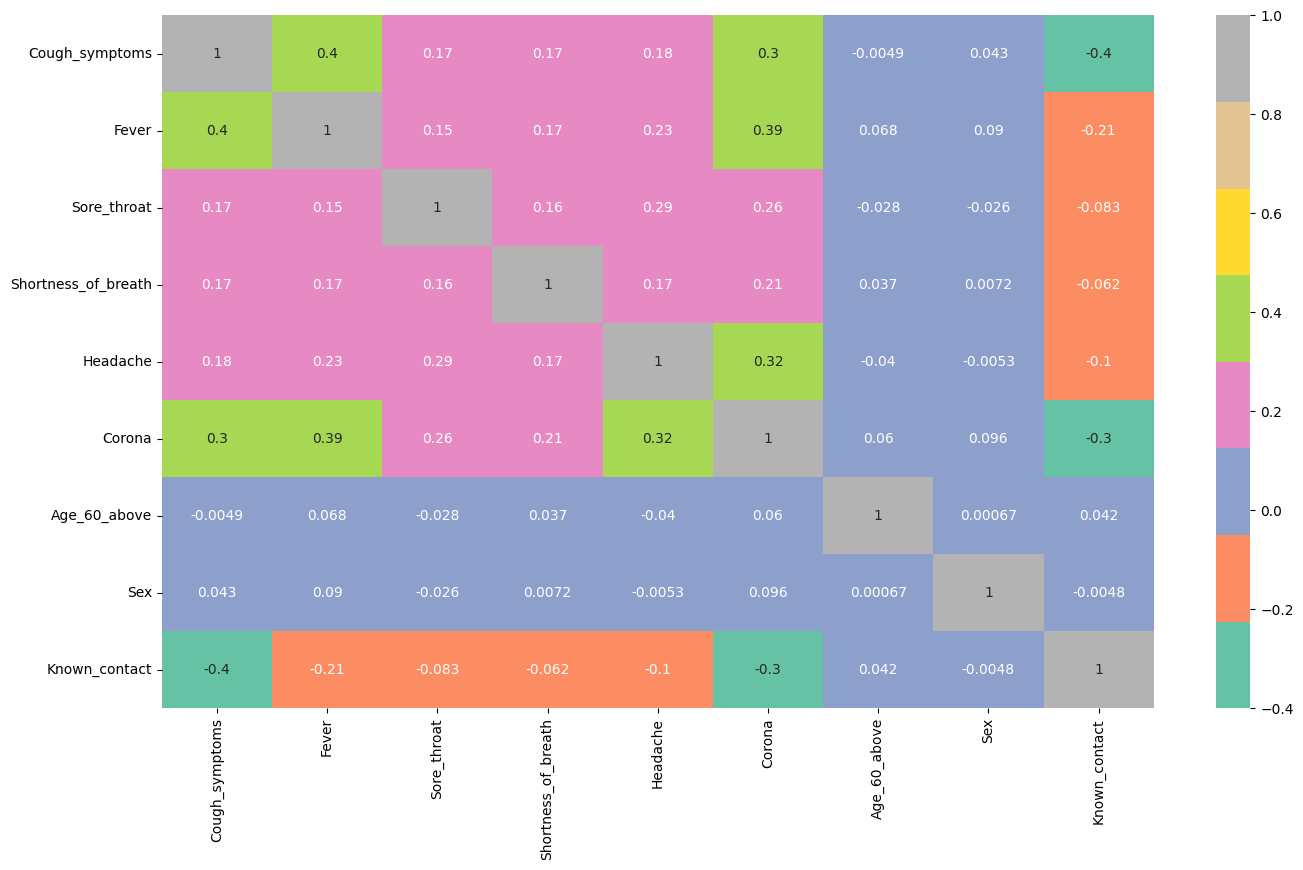

In [ ]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Set2')
plt.show()


In [ ]:
data.columns

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Corona', 'Age_60_above', 'Sex', 'Known_contact'],
      dtype='object')

In [ ]:
# training and normalization of data
X = data[['Cough_symptoms', 'Fever','Sore_throat', 'Shortness_of_breath', 'Headache','Age_60_above', 'Sex', 'Known_contact']]
Y = data['Corona']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

# SScaler = StandardScaler()
# X_train = SScaler.fit_transform(X_train)
# X_test = SScaler.fit_transform(X_test)

In [ ]:
# def roc_curve(Y_test, Y_score):
#     from sklearn.metrics import roc_curve, auc
#     fpr, tpr, thresholds = roc_curve(Y_test, Y_score)
#     score = metrics.auc(fpr, tpr)

#     fig = px.area(
#         #fpr = False Positive Rate; tpr= True Positive Rate
#         x=fpr, y=tpr,
#         title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
#         labels=dict(x='False Positive Rate', y='True Positive Rate'),
#         width=700, height=500
#     )

#     fig.add_shape(
#         type='line', line=dict(dash='dash'),
#         x0=0, x1=1, y0=0, y1=1
#     )

#     fig.update_yaxes(scaleanchor="x", scaleratio=1)
#     fig.update_xaxes(constrain='domain')
#     fig.show()

In [ ]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train,Y_train)



SVC()

In [ ]:
X_test

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
14564,0,0,0,0,0,0,1,2
17455,0,0,0,0,0,1,1,2
109259,1,1,0,0,0,0,0,1
25482,0,0,0,0,0,0,0,2
121095,1,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...
19918,0,0,0,0,0,0,0,2
28990,0,1,1,1,0,0,1,0
75670,1,0,0,0,0,1,1,2
17783,1,1,0,0,0,0,0,0


In [ ]:
Y_pred = svc.predict(X_test)
Y_pred



array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
#train aucc
svc_accuracy= round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
svc_accuracy

86.92

In [ ]:
# Y_pred = svc.predict(X_test)


In [ ]:
#to dump model
import pickle as pk
filename = 'model.pickle'
pk.dump(svc, open(filename, 'wb'))

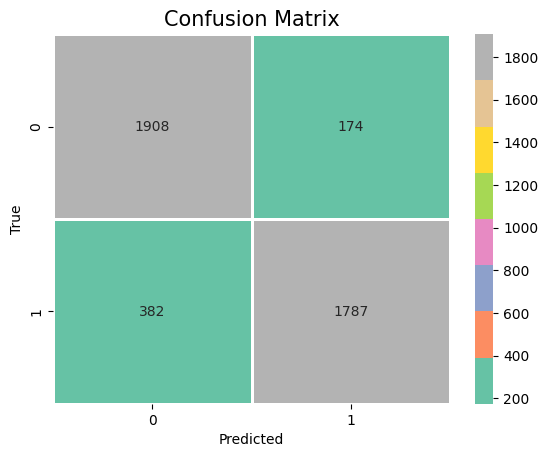

In [ ]:
# def impressions(model,accuracy):
# print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))
cm=confusion_matrix(Y_test,Y_pred)

class_label = [0, 1]

df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[1908,  174],
       [ 382, 1787]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
ytest = np.array(Y_test)
print(classification_report(ytest,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2082
           1       0.91      0.82      0.87      2169

    accuracy                           0.87      4251
   macro avg       0.87      0.87      0.87      4251
weighted avg       0.87      0.87      0.87      4251



In [ ]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()
log_regression.fit(X_train,Y_train)
Y_pred = log_regression.predict(X_test)

lg_accuracy= round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
lg_accuracy

72.43

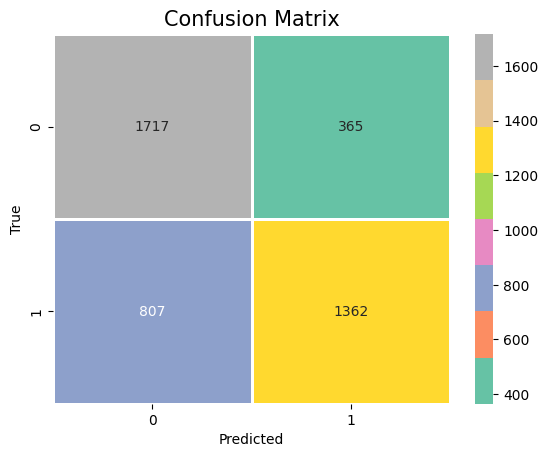

In [ ]:
# def impressions(model,accuracy):
# print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))
cm=confusion_matrix(Y_test,Y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
